In [14]:
library(gapminder)
library(dplyr)
library(ggplot2)

In [15]:
head(gapminder %>%
     filter(year ==2007) %>% mutate(pop = pop/1000000) %>% mutate(gdp = pop * gdpPercap) %>% arrange(desc(gdp)))

country,continent,year,lifeExp,pop,gdpPercap,gdp
United States,Americas,2007,78.242,301.13995,42951.653,12934459
China,Asia,2007,72.961,1318.68310,4959.115,6539501
Japan,Asia,2007,82.603,127.46797,31656.068,4035135
India,Asia,2007,64.698,1110.39633,2452.210,2722925
Germany,Europe,2007,79.406,82.40100,32170.374,2650871
United Kingdom,Europe,2007,79.425,60.77624,33203.261,2017969


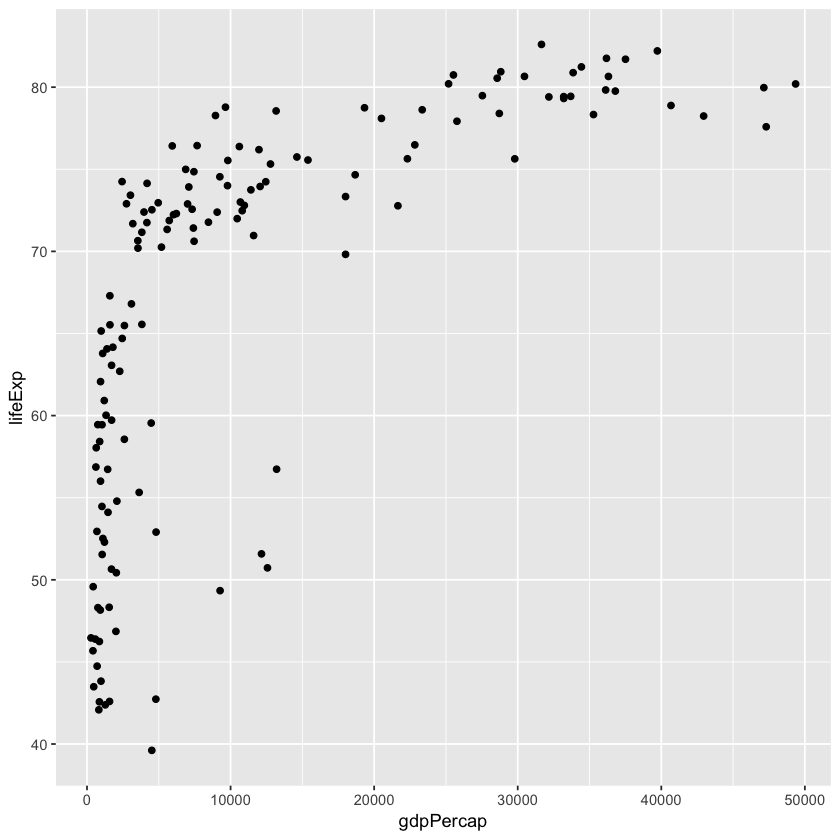

In [21]:
gapminder %>% filter(year ==2007) %>% ggplot(aes(x = gdpPercap, y = lifeExp)) + geom_point()

In [16]:
gapminder_1952 = gapminder %>% filter(year == 1952)

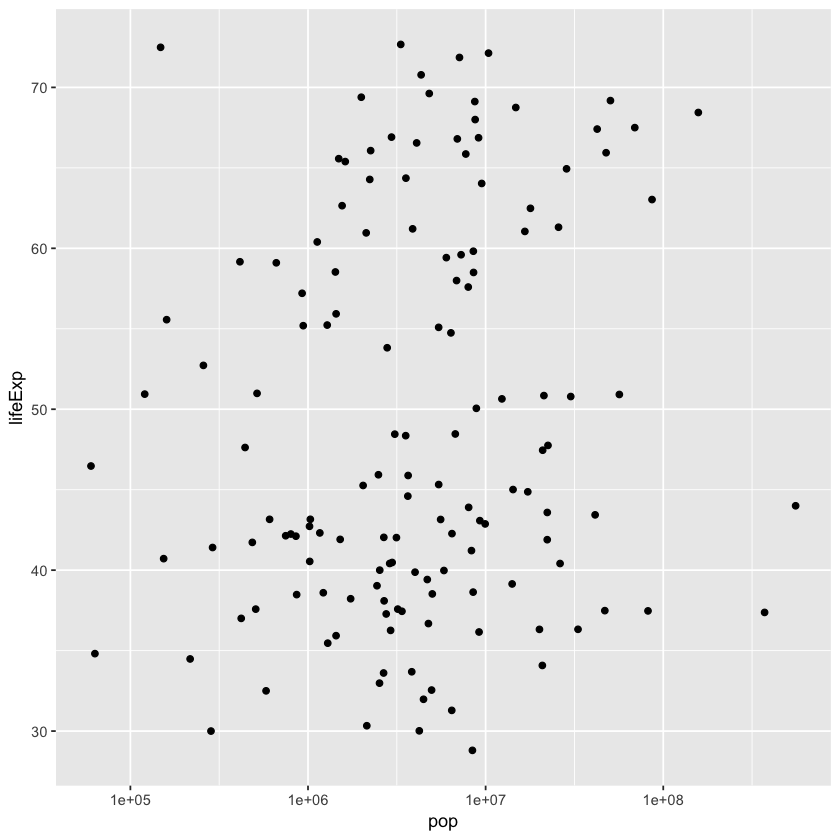

In [24]:
gapminder_1952 %>% ggplot(aes(x = pop, y = lifeExp)) + geom_point() + scale_x_log10()

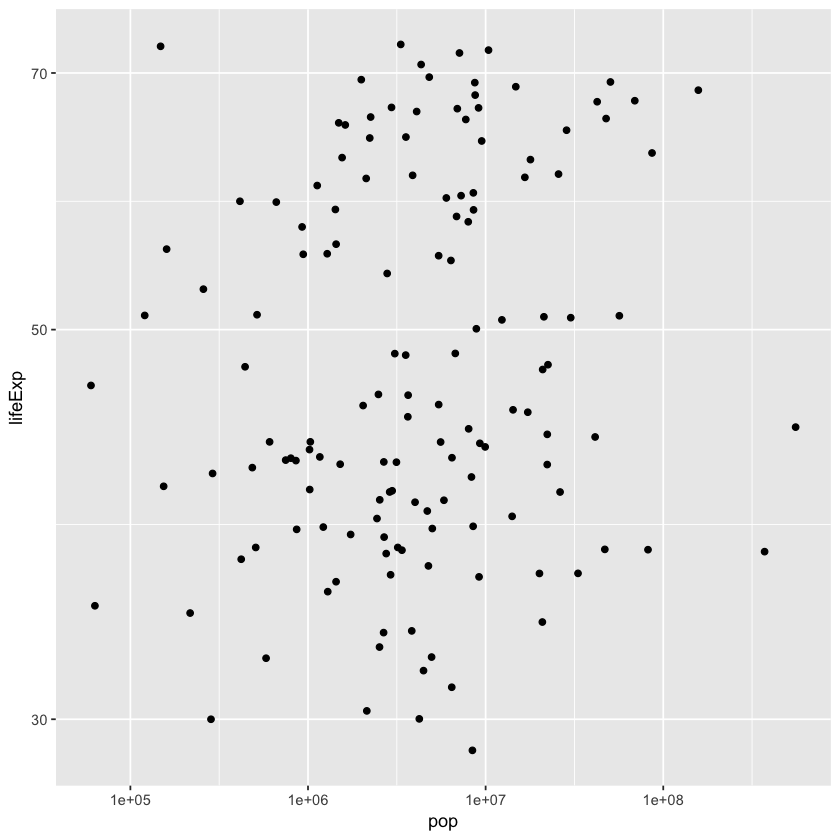

In [25]:
gapminder_1952 %>% ggplot(aes(x = pop, y = lifeExp)) + geom_point() + scale_x_log10() + scale_y_log10()

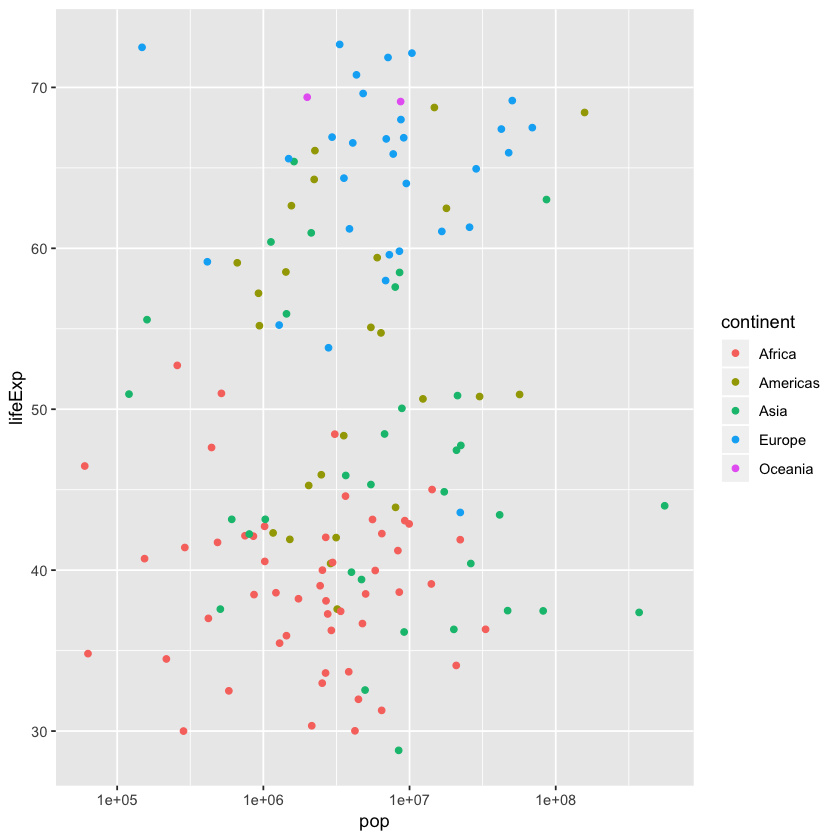

In [26]:
gapminder_1952 %>% ggplot(aes(x=pop, y=lifeExp, color=continent)) + geom_point() + scale_x_log10()

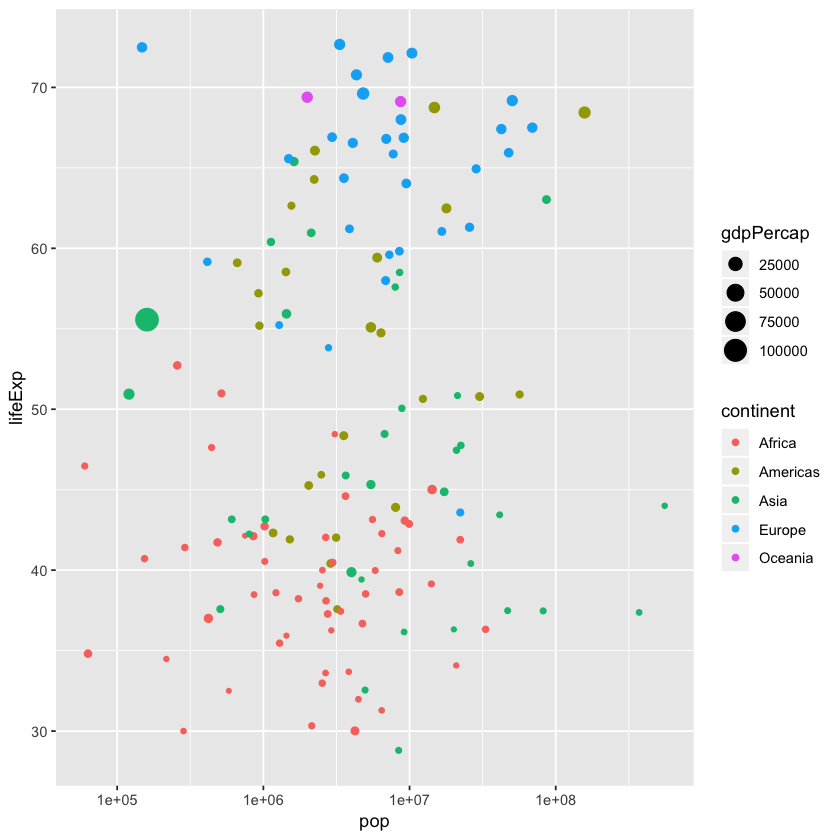

In [27]:
ggplot(gapminder_1952, aes(x = pop, y = lifeExp, color = continent, size=gdpPercap)) + geom_point() + scale_x_log10()

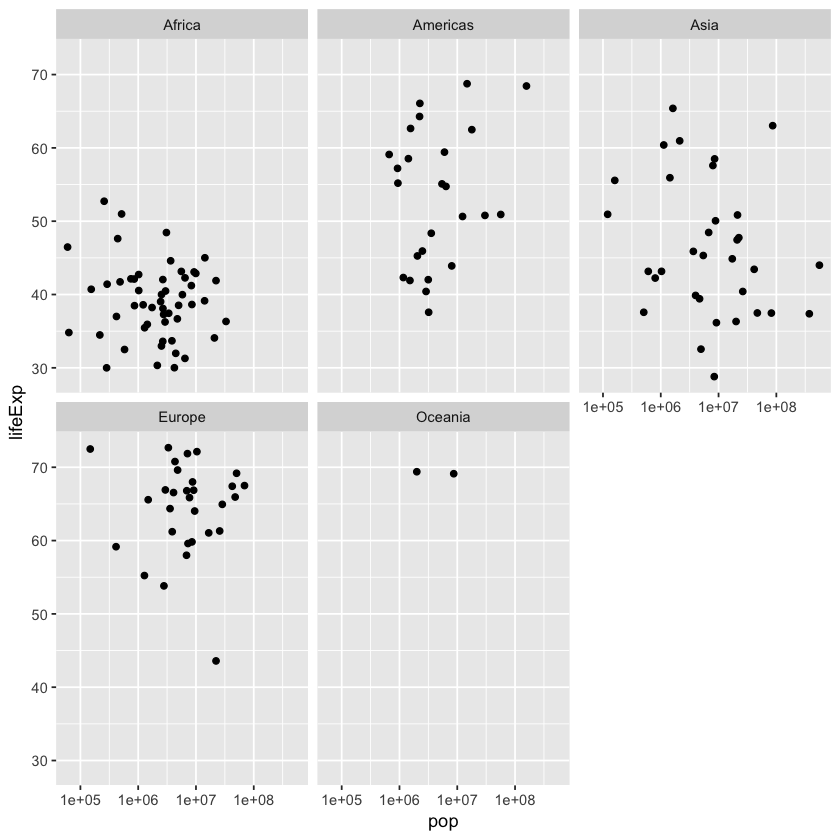

In [29]:
gapminder_1952 %>% ggplot(aes(x=pop, y=lifeExp)) + geom_point() + facet_wrap(~ continent) + scale_x_log10()

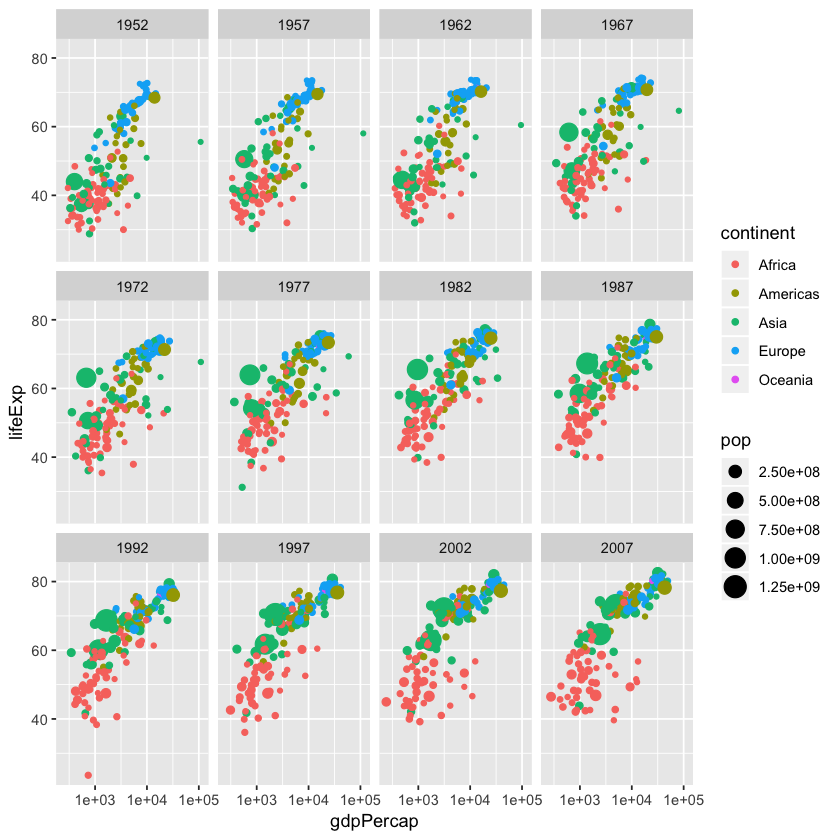

In [30]:
gapminder %>% ggplot(aes(x=gdpPercap, y=lifeExp, color=continent, size=pop)) + 
geom_point() + facet_wrap(~year) + scale_x_log10()

## summarize 

In [33]:
# Median Life Expectency 
gapminder %>% summarize(medianLifeExp=median(lifeExp))

medianLifeExp
60.7125


In [35]:
# Filter for 1957 then summarize the median life expectancy
gapminder %>% filter(year == 1957) %>% summarize(medianLifeExp=median(lifeExp))

medianLifeExp
48.3605


In [36]:
# Filter for 1957 then summarize the median life expectancy and the maximum GDP per capita
gapminder %>% filter(year == 1957) %>% summarize(medianLifeExp=median(lifeExp), maxGdpPercap=max(gdpPercap))

medianLifeExp,maxGdpPercap
48.3605,113523.1


## group_by

In [37]:
# Find median life expectancy and maximum GDP per capita in each year
gapminder %>% group_by(year) %>% summarize(medianLifeExp=median(lifeExp), maxGdpPercap=max(gdpPercap))

year,medianLifeExp,maxGdpPercap
1952,45.1355,108382.35
1957,48.3605,113523.13
1962,50.8810,95458.11
1967,53.8250,80894.88
1972,56.5300,109347.87
1977,59.6720,59265.48
1982,62.4415,33693.18
1987,65.8340,31540.97
1992,67.7030,34932.92
1997,69.3940,41283.16


In [40]:
# Find median life expectancy and maximum GDP per capita in each continent in 1957
gapminder %>% filter(year==1957) %>% group_by(continent) %>% summarize(medianLifeExp=median(lifeExp), maxGdpPercap=max(gdpPercap))

continent,medianLifeExp,maxGdpPercap
Africa,40.5925,5487.104
Americas,56.0740,14847.127
Asia,48.2840,113523.133
Europe,67.6500,17909.490
Oceania,70.2950,12247.395


In [43]:
# Find median life expectancy and maximum GDP per capita in each year/continent combination
gapminder %>% group_by(continent, year) %>% summarize(medianLifeExp=median(lifeExp), maxGdpPercap=max(gdpPercap))

continent,year,medianLifeExp,maxGdpPercap
Africa,1952,38.8330,4725.296
Africa,1957,40.5925,5487.104
Africa,1962,42.6305,6757.031
Africa,1967,44.6985,18772.752
Africa,1972,47.0315,21011.497
Africa,1977,49.2725,21951.212
Africa,1982,50.7560,17364.275
Africa,1987,51.6395,11864.408
Africa,1992,52.4290,13522.158
Africa,1997,52.7590,14722.842


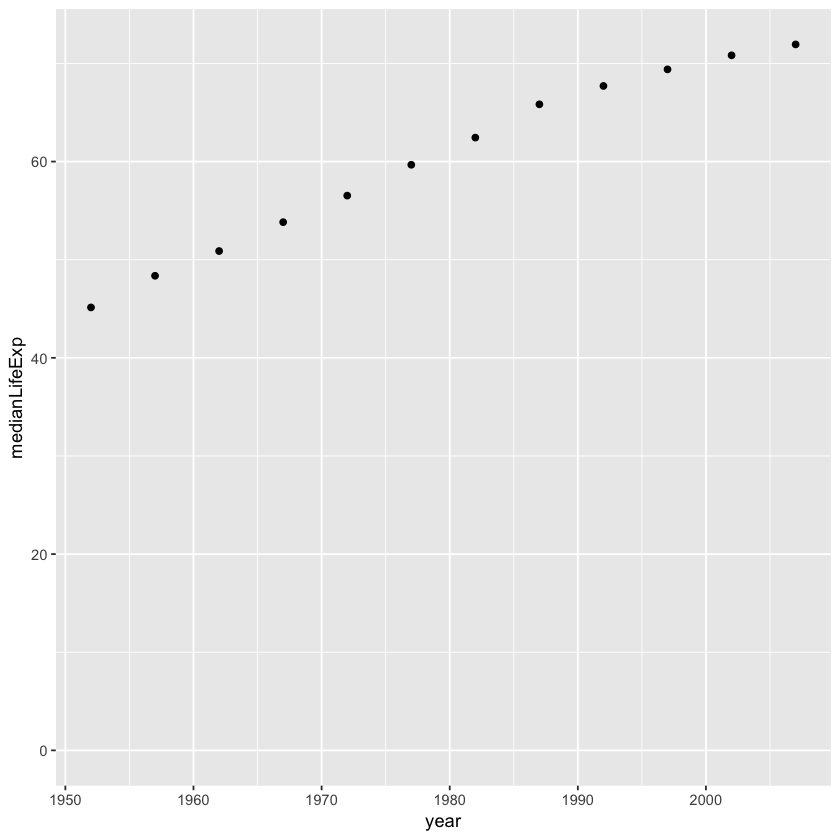

In [48]:
# Create a scatter plot showing the change in medianLifeExp over time
by_year = gapminder %>%
  group_by(year) %>%
  summarize(medianLifeExp = median(lifeExp),
            maxGdpPercap = max(gdpPercap))

by_year %>% ggplot(aes(x=year, y=medianLifeExp)) + geom_point() + expand_limits(y=0)

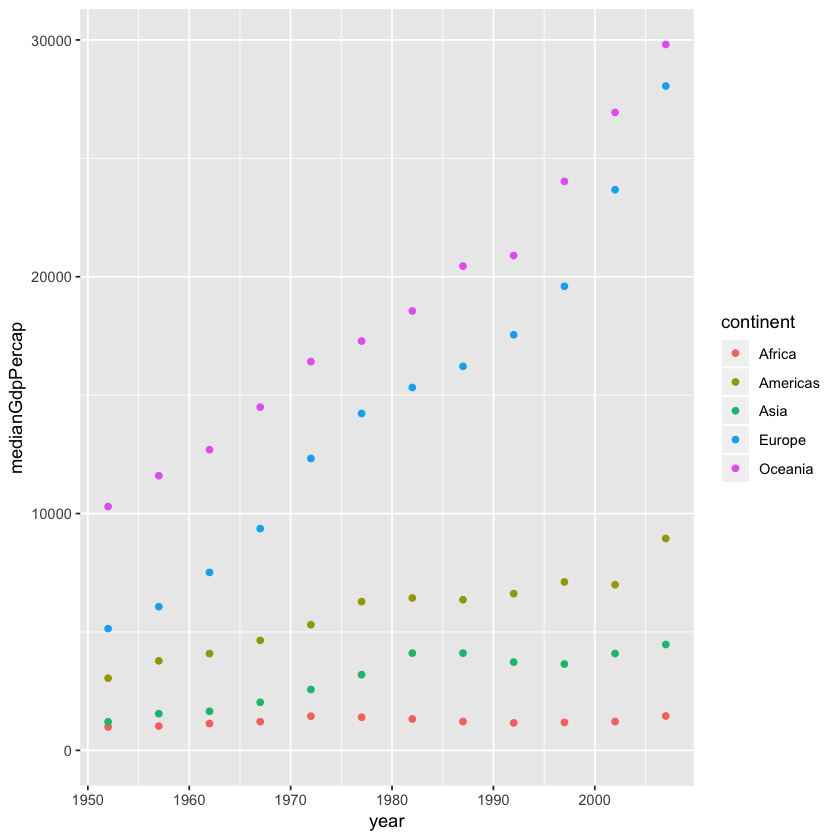

In [50]:
# Summarize medianGdpPercap within each continent within each year: by_year_continent
by_year_continent = gapminder %>% group_by(continent, year) %>% summarize(medianGdpPercap=median(gdpPercap))

# Plot the change in medianGdpPercap in each continent over time
by_year_continent %>% ggplot(aes(x=year, y=medianGdpPercap, color=continent)) + geom_point() + expand_limits(y=0)

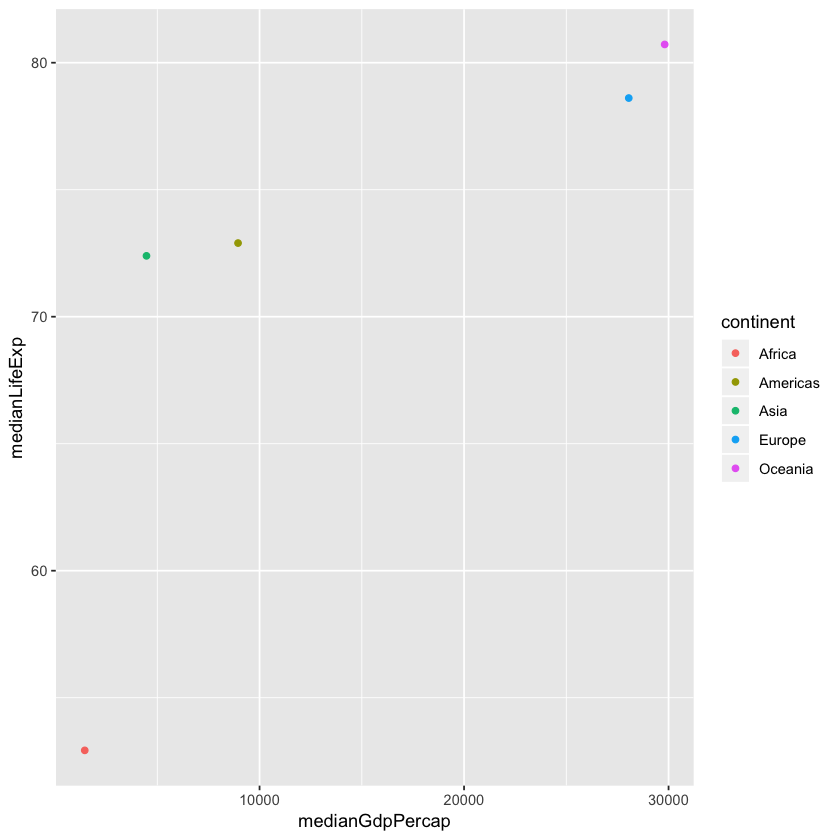

In [62]:
# Summarize the median GDP and median life expectancy per continent in 2007
by_continent_2007 = gapminder %>% 
        filter(year == 2007) %>% 
        group_by(continent) %>% 
        summarize(
            medianLifeExp = median(lifeExp),
            medianGdpPercap = median(gdpPercap)
        )

# Use a scatter plot to compare the median GDP and median life expectancy
by_continent_2007 %>% ggplot(aes(x=medianGdpPercap, y=medianLifeExp, color=continent)) + geom_point()

In [59]:
data

continent,medianLifeExp,medianGdpPercap
Africa,52.9265,1452.267
Americas,72.8990,8948.103
Asia,72.3960,4471.062
Europe,78.6085,28054.066
Oceania,80.7195,29810.188


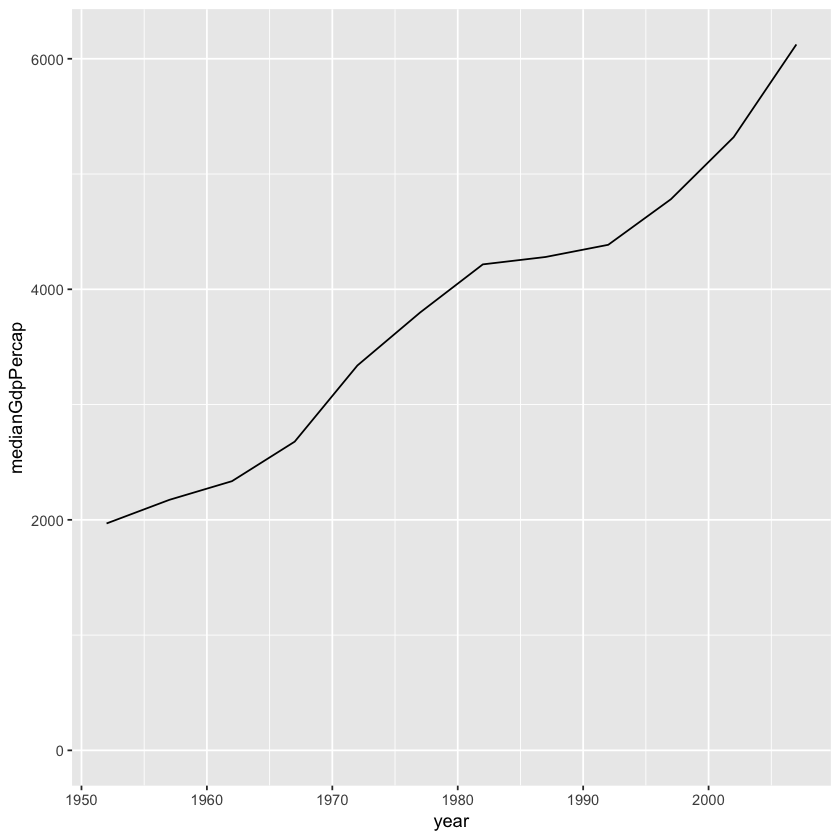

In [66]:
# Summarize the median gdpPercap by year, then save it as by_year
by_year = gapminder %>% group_by(year) %>% summarize(medianGdpPercap=median(gdpPercap))

# Create a line plot showing the change in medianGdpPercap over time
by_year %>% ggplot(aes(x=year, y=medianGdpPercap)) + geom_line() + expand_limits(y=0)

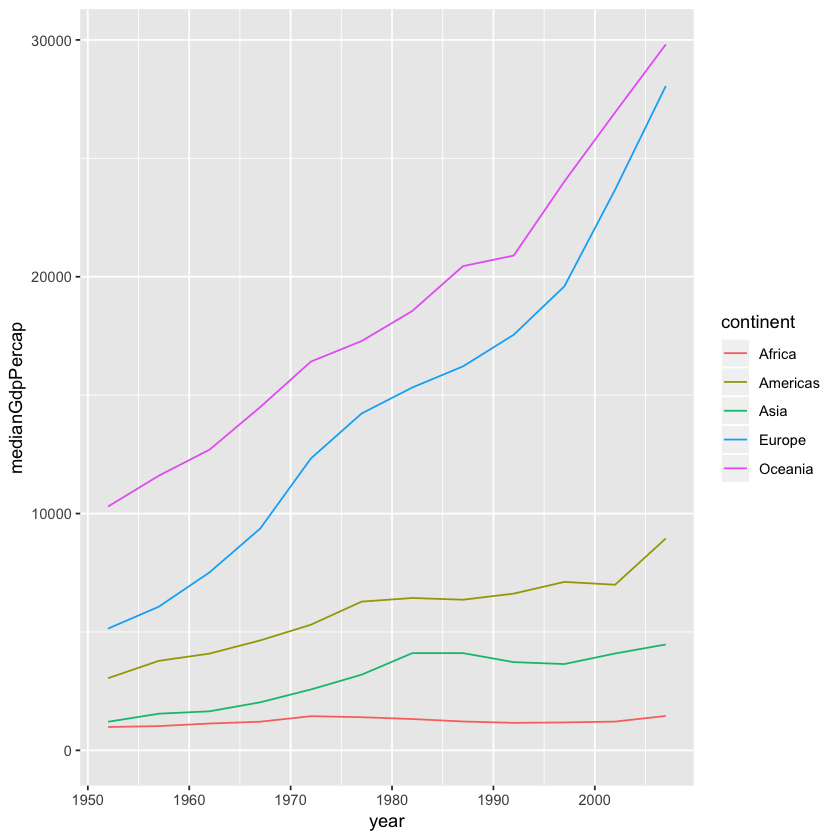

In [67]:
# Summarize the median gdpPercap by year & continent, save as by_year_continent
by_year_continent = gapminder %>% group_by(continent, year) %>% summarize(medianGdpPercap=median(gdpPercap))

# Create a line plot showing the change in medianGdpPercap by continent over time
by_year_continent %>% ggplot(aes(x=year, y=medianGdpPercap, color=continent)) + geom_line() + expand_limits(y=0)

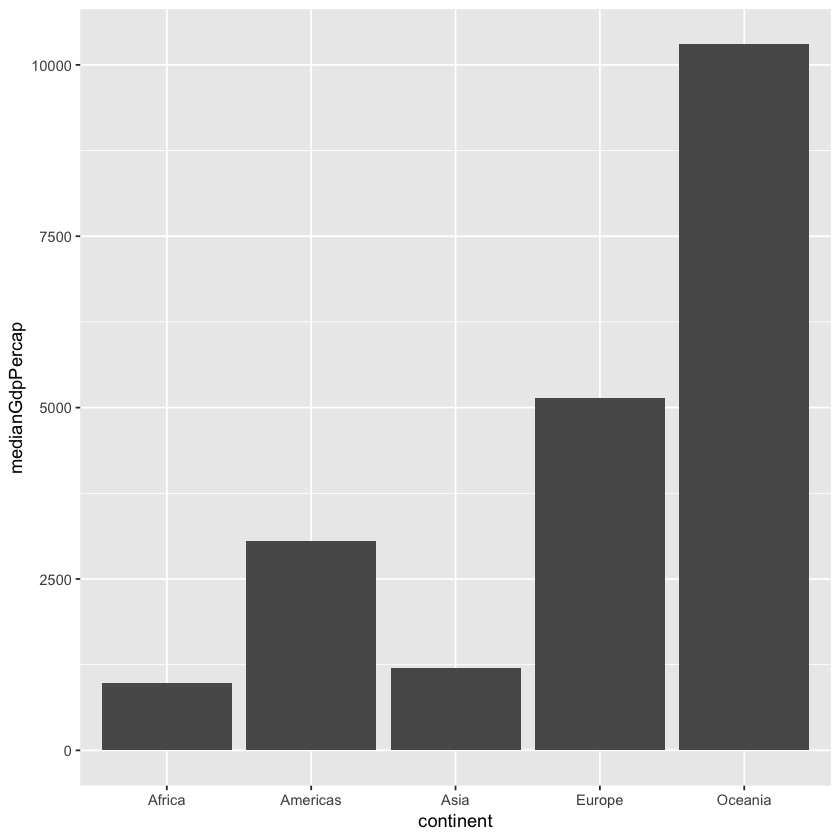

In [69]:
# Summarize the median gdpPercap by year and continent in 1952
by_continent = gapminder %>% filter(year==1952) %>% group_by(continent) %>% summarize(medianGdpPercap=median(gdpPercap))

# Create a bar plot showing medianGdp by continent
by_continent %>% ggplot(aes(x=continent, y=medianGdpPercap)) + geom_col()

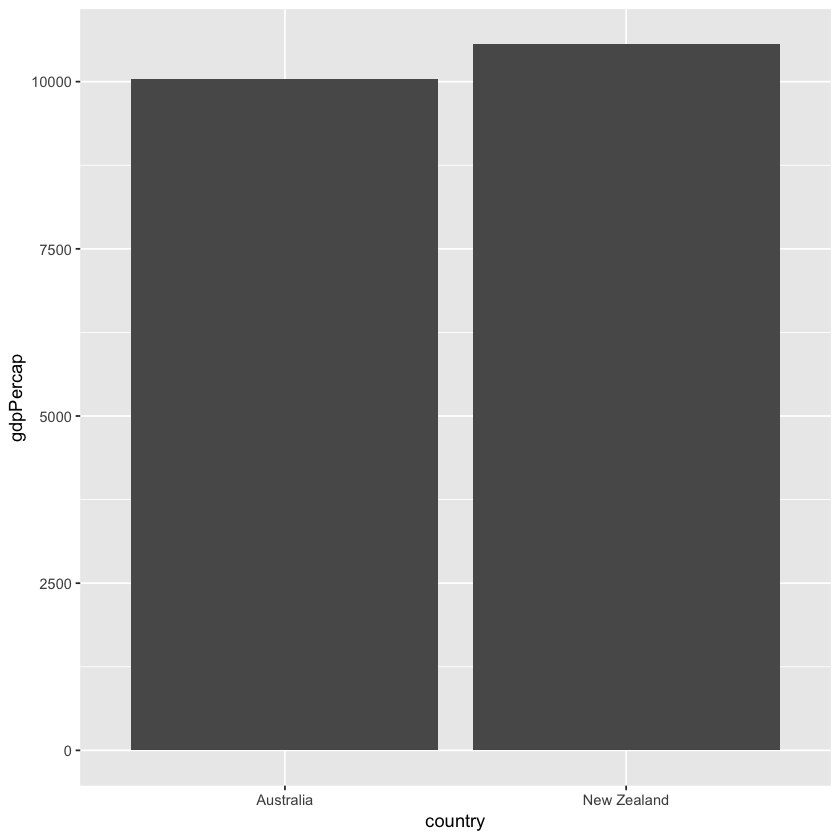

In [73]:
# Summarize the median gdpPercap by year and continent in 1952
oceania_1952 = gapminder %>% filter(year==1952 & continent=="Oceania")

# Create a bar plot showing medianGdp by continent
oceania_1952 %>% ggplot(aes(x=country, y=gdpPercap)) + geom_col()

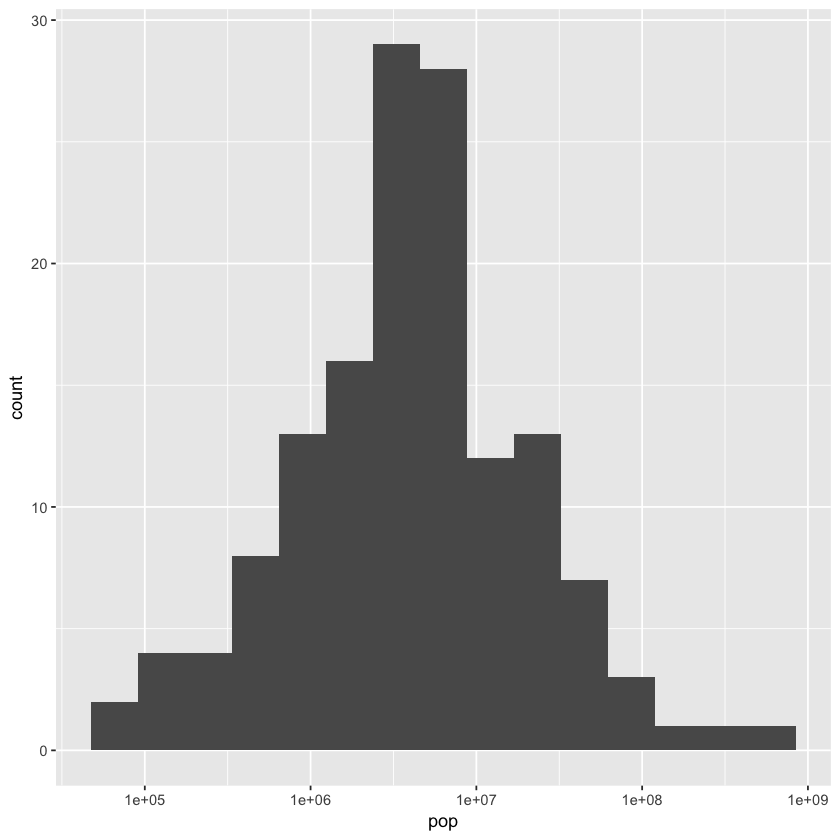

In [79]:
gapminder_1952 <- gapminder %>%
  filter(year == 1952)

# Create a histogram of population (pop), with x on a log scale
gapminder_1952 %>% ggplot(aes(x=pop)) + geom_histogram(bins = 15) + scale_x_log10()

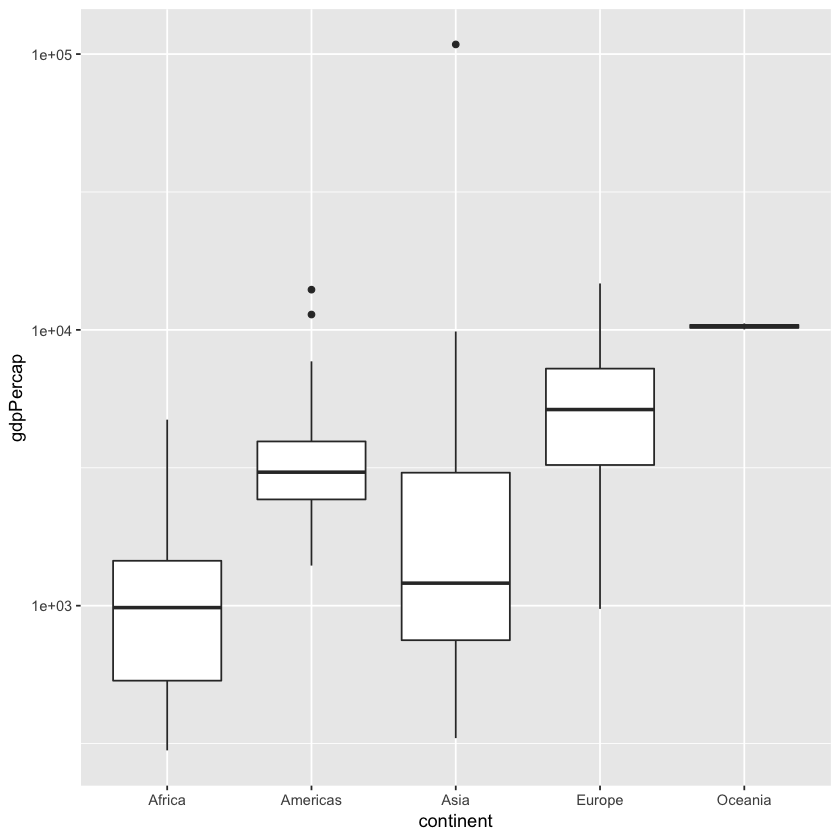

In [83]:
gapminder_1952 <- gapminder %>%
  filter(year == 1952)

# Create a boxplot comparing gdpPercap among continents
gapminder_1952 %>% ggplot(aes(x=continent, y=gdpPercap)) + geom_boxplot() + scale_y_log10()

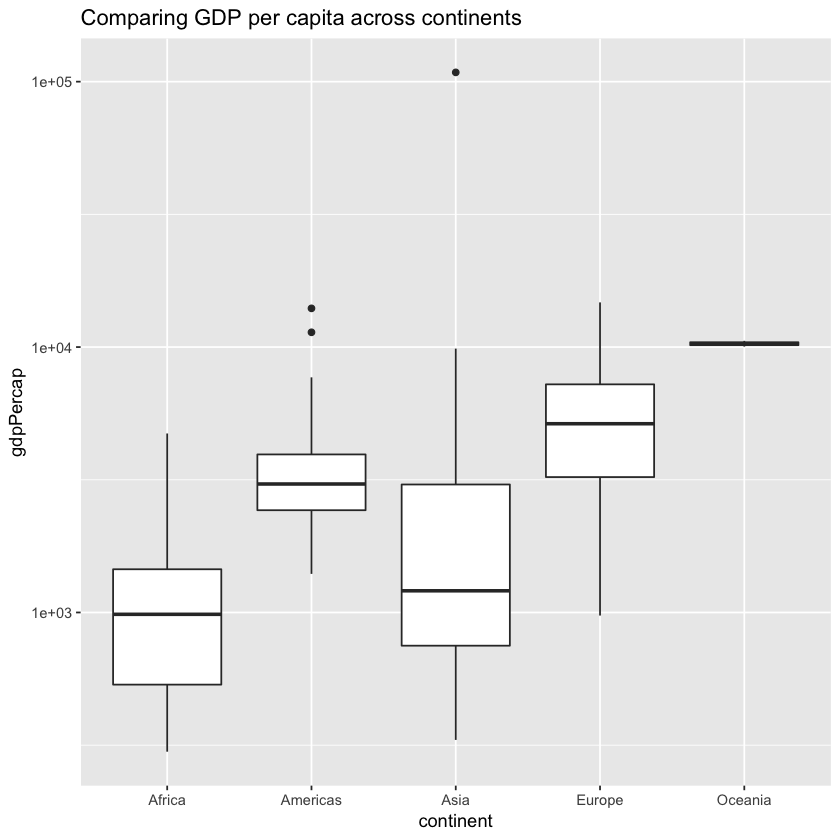

In [85]:
gapminder_1952 <- gapminder %>%
  filter(year == 1952)

# Add a title to this graph: "Comparing GDP per capita across continents"
ggplot(gapminder_1952, aes(x = continent, y = gdpPercap)) +
  geom_boxplot() +
  scale_y_log10() + 
  ggtitle("Comparing GDP per capita across continents") 